<a href="https://colab.research.google.com/github/SrJames14/Proyecto/blob/main/siniestrovial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SECRETARIA DE MOVILIDAD DISTRITAL (**BOGOTA DC**)
Registro de accidentes
#Descripcion del problema
##Cuales son los patrones temporales, demograficos entre accidentes?
##Que factores se relacionan mas con la gravedad de los siniestros?
##Que dia es mas frecuente un accidente?



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Importacion de librerias
import pandas as pd #Para manejo facil de datos
import seaborn as sns #Herramientas de visualizacion
import matplotlib.pyplot as plt #Herramientas de graficos
import numpy as np #Herramientas de calculo
import missingno as msno #Para los datos faltantes


#Lectura y visualizacion de base de datos para verificar
df = pd.read_csv('/content/drive/MyDrive/datas/datased.csv')
df.head()

,X,Y,OBJECTID,CODIGO_ACCIDENTADO,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,...,DIRECCION,CLASE_ACC,LOCALIDAD,CODIGO_VEHICULO,CONDICION,MUERTE_POSTERIOR,FECHA_POSTERIOR_MUERTE,GENERO,EDAD,CONDICION_A
0,-74.120169,4.533633,13,12905436,A001677733,2024/09/01 05:00:00+00,23:00:00,2024,SEPTIEMBRE,DOMINGO,...,KR 14 - CL 65 S 02,CHOQUE,USME,1.0,MOTOCICLISTA,N,NaN,MASCULINO,24.0,MOTOCICLISTA
1,-74.086294,4.548137,17,12905440,A001676099,2024/09/03 05:00:00+00,01:15:00,2024,SEPTIEMBRE,MARTES,...,KR 11 E- CL 40 A S 02,CHOQUE,SAN CRISTOBAL,1.0,MOTOCICLISTA,N,NaN,MASCULINO,124.0,MOTOCICLISTA
2,-74.178984,4.601791,27,12905444,A001677641,2024/09/03 05:00:00+00,22:50:00,2024,SEPTIEMBRE,MARTES,...,CL 59 S- KR 78 02,CHOQUE,BOSA,1.0,MOTOCICLISTA,N,NaN,MASCULINO,21.0,MOTOCICLISTA
3,-74.181189,4.608725,77,12906038,A001614065,2024/09/07 05:00:00+00,04:02:00,2024,SEPTIEMBRE,SABADO,...,KR 80 - CL 59 S 02,CHOQUE,BOSA,2.0,MOTOCICLISTA,N,NaN,MASCULINO,41.0,MOTOCICLISTA
4,-74.099087,4.599850,92,12906049,A001677132,2024/09/08 05:00:00+00,01:37:00,2024,SEPTIEMBRE,DOMINGO,...,KR 27 - CL 2 02,CHOQUE,LOS MARTIRES,2.0,MOTOCICLISTA,N,NaN,MASCULINO,24.0,MOTOCICLISTA


In [7]:
#Limpieza de datos y analisis principal
#Cambia los tipo de datos
df['FECHA_OCURRENCIA_ACC']= pd.to_datetime(df['FECHA_OCURRENCIA_ACC'])
df = df[(df['EDAD'] >= 0) & (df['EDAD'] <= 110)] #Elimina errores de edades imposibles
df['EDAD'] = df['EDAD'].astype(int) #Convierte la colunma Edad como tipo int
df['MUERTE_POSTERIOR'] = df['MUERTE_POSTERIOR'].replace({'N':'NO' , 'S':'SI'}) #Cambia la letra N o S remplazandola con la palabra No o si
df['FECHA_POSTERIOR_MUERTE']=df['FECHA_POSTERIOR_MUERTE'].fillna('No aplica') #cambia la frase NaN por No Aplica
#Elimina columnas innecesarias
df = df.drop(['ANO_OCURRENCIA_ACC' , 'MES_OCURRENCIA_ACC' , 'FECHA_HORA_ACC' , 'CODIGO_VEHICULO' , 'CONDICION_A'], axis=1)
df.head() #Vuelve a ver las 5 primeras filas para visualizar los cambios corregidos

,X,Y,OBJECTID,CODIGO_ACCIDENTADO,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,CLASE_ACC,LOCALIDAD,CONDICION,MUERTE_POSTERIOR,FECHA_POSTERIOR_MUERTE,GENERO,EDAD
0,-74.120169,4.533633,13,12905436,A001677733,2024-09-01 05:00:00+00:00,23:00:00,DOMINGO,KR 14 - CL 65 S 02,CHOQUE,USME,MOTOCICLISTA,NO,No aplica,MASCULINO,24
2,-74.178984,4.601791,27,12905444,A001677641,2024-09-03 05:00:00+00:00,22:50:00,MARTES,CL 59 S- KR 78 02,CHOQUE,BOSA,MOTOCICLISTA,NO,No aplica,MASCULINO,21
3,-74.181189,4.608725,77,12906038,A001614065,2024-09-07 05:00:00+00:00,04:02:00,SABADO,KR 80 - CL 59 S 02,CHOQUE,BOSA,MOTOCICLISTA,NO,No aplica,MASCULINO,41
4,-74.099087,4.599850,92,12906049,A001677132,2024-09-08 05:00:00+00:00,01:37:00,DOMINGO,KR 27 - CL 2 02,CHOQUE,LOS MARTIRES,MOTOCICLISTA,NO,No aplica,MASCULINO,24
5,-74.190757,4.618136,149,12906120,A001677773,2024-09-09 05:00:00+00:00,20:24:00,LUNES,KR 86 - CL 67 B S 02,CHOQUE,BOSA,MOTOCICLISTA,NO,No aplica,FEMENINO,32


In [8]:
#Ver la informacion general con las columnas ya editadas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8120 entries, 0 to 8655
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   X                       8120 non-null   float64            
 1   Y                       8120 non-null   float64            
 2   OBJECTID                8120 non-null   int64              
 3   CODIGO_ACCIDENTADO      8120 non-null   int64              
 4   FORMULARIO              8120 non-null   object             
 5   FECHA_OCURRENCIA_ACC    8120 non-null   datetime64[ns, UTC]
 6   HORA_OCURRENCIA_ACC     8120 non-null   object             
 7   DIA_OCURRENCIA_ACC      8120 non-null   object             
 8   DIRECCION               8120 non-null   object             
 9   CLASE_ACC               8118 non-null   object             
 10  LOCALIDAD               8033 non-null   object             
 11  CONDICION               8120 non-null   object  

#Extensiones y desarrollos de variables

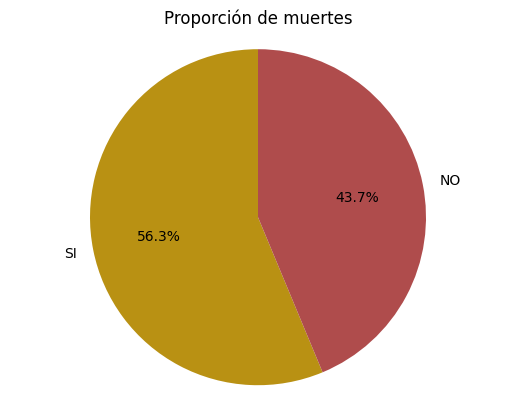

MUERTE_POSTERIOR
SI    2983
NO    2317
Name: count, dtype: int64


In [9]:
#Definir variables para analisis
#Define la mortalidad general
Total_Muerte = df['MUERTE_POSTERIOR'].value_counts() #Crea la variable para contar las muertes
colores = ['#b99113', '#af4c4c'] #Seleccion de color para personalizacion del grafico con codigo HEX (2 colores)
plt.pie(Total_Muerte, labels=Total_Muerte.index, autopct='%1.1f%%', startangle=90 , colors=colores) #Crea grafico de torta para visualizar la proporcion
plt.title('Proporción de muertes') #Para agregar un titulo
plt.axis('equal')  #Ajusta la proporcion automaticamente (igual)
plt.show() #Muestra el grafico creado
print(Total_Muerte) #Muestra la informacion de la variable


#Conclusion
Se observa en el grafico de "proporcion de muertes" que en general, una mayor parte de personas accidentadas en transito, en la ciudad de bogota han sufrido una muerte, por lo que es mas probable que al sufrir un accidente de transito el conductor o pasajero pierdan la vida

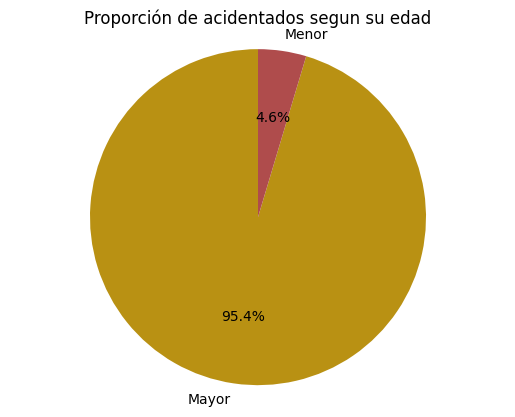

ES_MAYOR_EDAD
Mayor    7744
Menor     376
Name: count, dtype: int64


In [10]:
df['ES_MAYOR_EDAD'] = np.where(df['EDAD'] >= 18, 'Mayor', 'Menor') #Crea una columna dependiendo de su edad
Total_Accidentados = df['ES_MAYOR_EDAD'].value_counts() #Variable de accidentalidad dependiendo de la columna creada
colors = ['#b99113', '#af4c4c'] #Seleccion de color para personalizacion del grafico con codigo HEX (2 colores)
plt.pie(Total_Accidentados, labels=Total_Accidentados.index, autopct='%1.1f%%', startangle=90 ,colors=colors) #Crea grafico de torta para visualizar la proporcion
plt.title('Proporción de acidentados segun su edad')  #Para agregar un titulo
plt.axis('equal')  #Ajusta la proporcion automaticamente (igual)
plt.show() #Muestra el grafico creado
print(Total_Accidentados) #Muestra informacion de la variable

#Conclusion
Para este caso la accidentalidad le ocurrieron a personas mayor de edad, ya que es mas logico que por lo general las personas mayores de edad conduzcan algun vehiculo, por lo que la gran mayoria de estos fueron los accidentados

In [11]:

df.head() #Vuelve a ver las 5 primeras filas para visualizar la columna nueva

,X,Y,OBJECTID,CODIGO_ACCIDENTADO,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,CLASE_ACC,LOCALIDAD,CONDICION,MUERTE_POSTERIOR,FECHA_POSTERIOR_MUERTE,GENERO,EDAD,ES_MAYOR_EDAD
0,-74.120169,4.533633,13,12905436,A001677733,2024-09-01 05:00:00+00:00,23:00:00,DOMINGO,KR 14 - CL 65 S 02,CHOQUE,USME,MOTOCICLISTA,NO,No aplica,MASCULINO,24,Mayor
2,-74.178984,4.601791,27,12905444,A001677641,2024-09-03 05:00:00+00:00,22:50:00,MARTES,CL 59 S- KR 78 02,CHOQUE,BOSA,MOTOCICLISTA,NO,No aplica,MASCULINO,21,Mayor
3,-74.181189,4.608725,77,12906038,A001614065,2024-09-07 05:00:00+00:00,04:02:00,SABADO,KR 80 - CL 59 S 02,CHOQUE,BOSA,MOTOCICLISTA,NO,No aplica,MASCULINO,41,Mayor
4,-74.099087,4.599850,92,12906049,A001677132,2024-09-08 05:00:00+00:00,01:37:00,DOMINGO,KR 27 - CL 2 02,CHOQUE,LOS MARTIRES,MOTOCICLISTA,NO,No aplica,MASCULINO,24,Mayor
5,-74.190757,4.618136,149,12906120,A001677773,2024-09-09 05:00:00+00:00,20:24:00,LUNES,KR 86 - CL 67 B S 02,CHOQUE,BOSA,MOTOCICLISTA,NO,No aplica,FEMENINO,32,Mayor


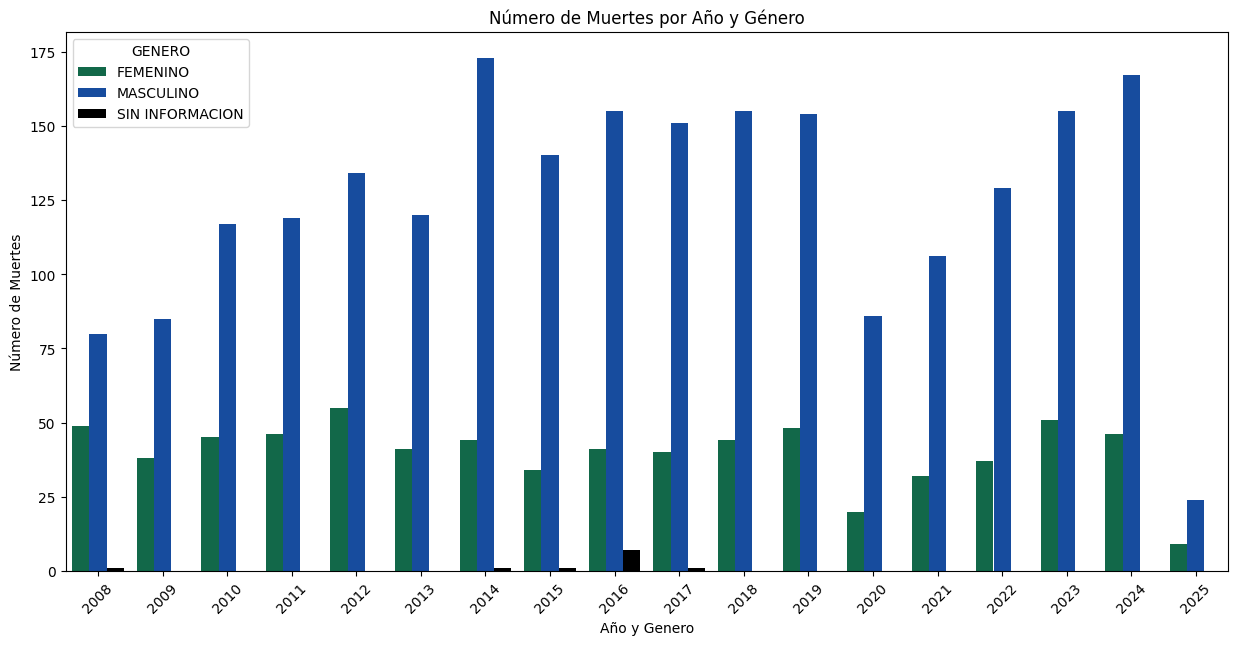

     AÑO           GENERO  MUERTE_POSTERIOR
0   2008         FEMENINO                49
1   2008        MASCULINO                80
2   2008  SIN INFORMACION                 1
3   2009         FEMENINO                38
4   2009        MASCULINO                85
5   2010         FEMENINO                45
6   2010        MASCULINO               117
7   2011         FEMENINO                46
8   2011        MASCULINO               119
9   2012         FEMENINO                55
10  2012        MASCULINO               134
11  2013         FEMENINO                41
12  2013        MASCULINO               120
13  2014         FEMENINO                44
14  2014        MASCULINO               173
15  2014  SIN INFORMACION                 1
16  2015         FEMENINO                34
17  2015        MASCULINO               140
18  2015  SIN INFORMACION                 1
19  2016         FEMENINO                41
20  2016        MASCULINO               155
21  2016  SIN INFORMACION       

<Figure size 640x480 with 0 Axes>

In [12]:
#Hace cruces de variables para analisis en grafico de barras
df['AÑO'] = df['FECHA_OCURRENCIA_ACC'].dt.year #Separa el año de la fecha completa
Muertos = df[df['MUERTE_POSTERIOR'] == 'SI'] #Cuenta solo las muertes
muertes_por_año_genero = Muertos.groupby(['AÑO', 'GENERO'])['MUERTE_POSTERIOR'].count().reset_index() #Agrupa todas las variables y crea una nueva matriz para poder graficar
plt.figure(figsize=(15, 7)) #Ajusta el tamaño de la grafica en coordenadas X, Y
colores_n = ['#04764d', '#0047b4', '#000000'] #Colores personalizados del codigo HEX
sns.barplot(data=muertes_por_año_genero, x='AÑO', y='MUERTE_POSTERIOR', hue='GENERO' , palette=colores_n) #Crea y organiza la grafica
plt.title('Número de Muertes por Año y Género') #Titulo del grafico
plt.xlabel('Año y Genero') #Titulo del eje X
plt.ylabel('Número de Muertes') #Titulo del eje Y
plt.xticks(rotation=45) #Rota la leyenda
plt.show() #Muestra el grafico
plt.tight_layout() #Ajuste automatico de la grafica
print(muertes_por_año_genero) #Muestra la informacion de la variable

# **Conclusion**


-Se puede concluir que el número de muertes relacionadas con accidentes de tránsito en Bogotá muestra variaciones a lo largo de los años representados. Es evidente que, en general, el género masculino presenta un número de muertes consistentemente mayor que el género femenino en todos los años. Esto sugiere que los hombres se ven más afectados por fatalidades en accidentes de tránsito en comparación con las mujeres.

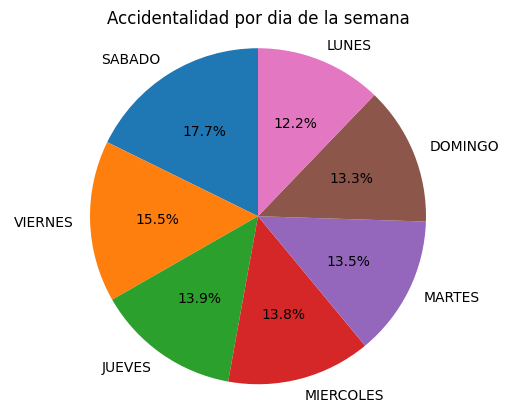

DIA_OCURRENCIA_ACC
SABADO       1440
VIERNES      1262
JUEVES       1127
MIERCOLES    1124
MARTES       1096
DOMINGO      1082
LUNES         989
Name: count, dtype: int64


In [13]:
Total_Accidentes = df['DIA_OCURRENCIA_ACC'].value_counts() #Contador para ingresar proporciones
plt.pie(Total_Accidentes, labels=Total_Accidentes.index, autopct='%1.1f%%', startangle=90 ) #Crea grafico de torta para visualizar la proporcion
plt.title('Accidentalidad por dia de la semana')  #Para agregar un titulo
plt.axis('equal')  #Ajusta la proporcion automaticamente (igual)
plt.show() #Muestra el grafico creado
print(Total_Accidentes) #Muestra informacion de la variable

#**Conclusion**
Se determina que el dia con mas accidentalidad es el dia sabado con 1440 accidentes de 8120 (17.7%), tiene sentido ya que una posible causa es la cantidad de trafico aquel dia, ya que por ser fin de semana se genera mas trafico por lo tanto mas accidentes.

El dia con menos accidentes son los dias lunes con 989 accidentes de 8120 (12.2%), al inicio y al fin de semana se notan los picos.

La accidentalidad el dia jueves con (13.9%) es la mas cercana a la media de accidentes en la semana siendo la media (100/7)%

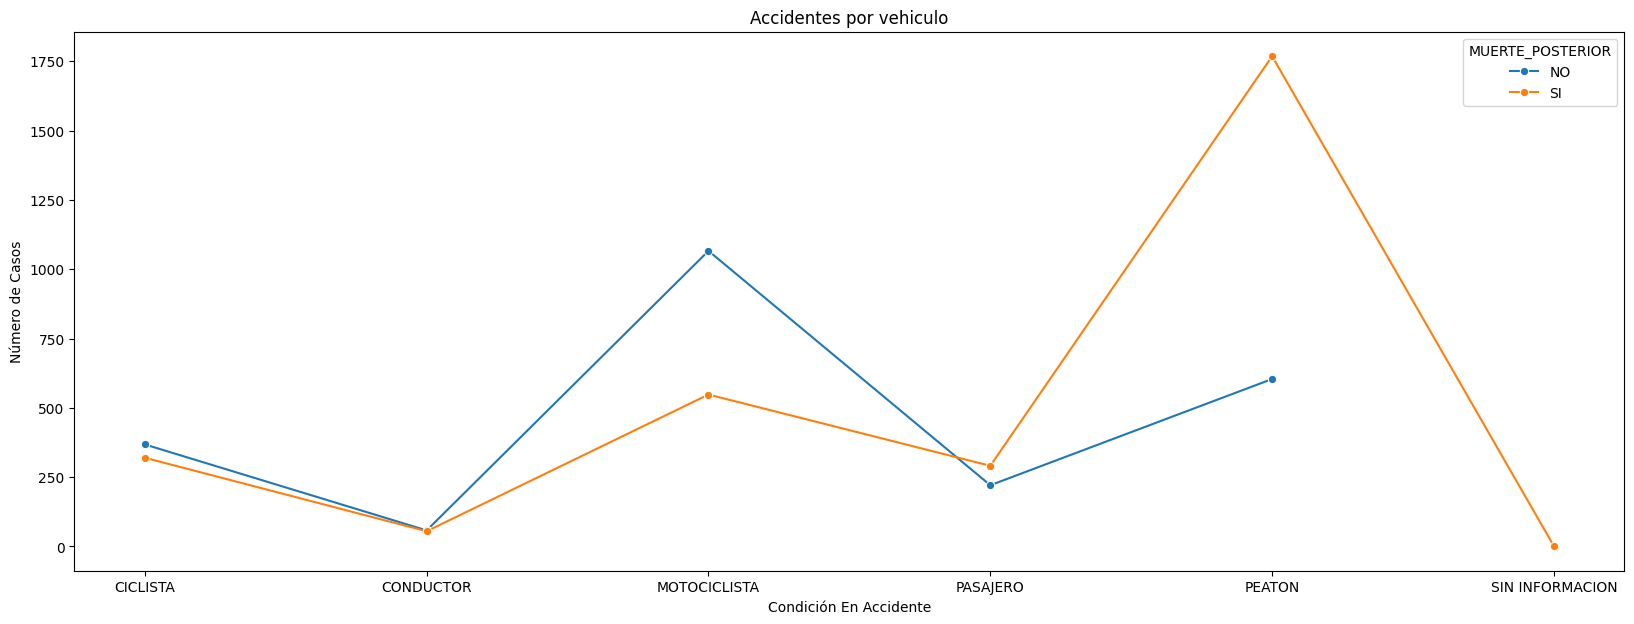

          CONDICION MUERTE_POSTERIOR  Total
0          CICLISTA               NO    368
1          CICLISTA               SI    320
2         CONDUCTOR               NO     58
3         CONDUCTOR               SI     55
4      MOTOCICLISTA               NO   1066
5      MOTOCICLISTA               SI    548
6          PASAJERO               NO    221
7          PASAJERO               SI    291
8            PEATON               NO    604
9            PEATON               SI   1768
10  SIN INFORMACION               SI      1


In [14]:
condicion_muerte_counts = df.groupby(['CONDICION', 'MUERTE_POSTERIOR']).size().reset_index(name='Total') #Agrupacion para realizar el grafico
plt.figure(figsize=(20, 7)) #Tamaño del grafico
sns.lineplot(data=condicion_muerte_counts, x='CONDICION', y='Total', hue='MUERTE_POSTERIOR', marker='o') #Crea el grafico de lineas
plt.title('Accidentes por vehiculo') #Titulo del grafico
plt.xlabel('Condición En Accidente') #Eje X
plt.ylabel('Número de Casos') #Eje Y
plt.show() #Muestra el grafico
print(condicion_muerte_counts) #Muestra datos especificos del grafico

#**Conclusion**
El análisis de los casos de siniestros viales según la condición de la persona involucrada (ciclista, conductor, motociclista, pasajero, peatón, etc.) y la ocurrencia de muerte posterior al accidente revela patrones preocupantes en la seguridad vial.

Los peatones representan el grupo más afectado en términos de mortalidad, con un total de 1.768 casos fatales, lo que destaca su alta vulnerabilidad en el entorno vial. Los motociclistas también muestran un número elevado de muertes posteriores (548 casos), lo que indica que este grupo enfrenta un riesgo considerable en las vías, posiblemente por la exposición directa y menor protección en caso de colisión.

En el caso de los ciclistas, los datos revelan una proporción casi equilibrada entre sobrevivientes y fallecidos tras los accidentes (368 no fallecidos vs. 320 fallecidos), lo cual también refleja un nivel significativo de exposición al riesgo.

En contraste, los conductores y pasajeros presentan cifras de mortalidad mucho menores, lo que podría atribuirse a mejores condiciones de seguridad pasiva (como cinturones, airbags y estructuras de protección en vehículos).


<ipython-input-32-6fe2d833d458>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='MUERTE_POSTERIOR', y='EDAD', palette='pastel')  #Crea el grafico boxplot


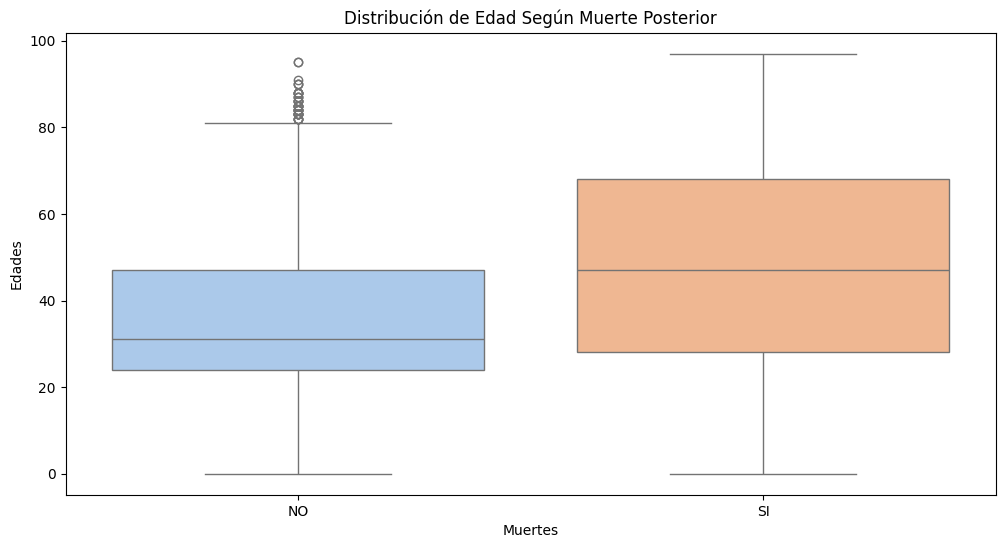

<bound method Series.reset_index of EDAD  MUERTE_POSTERIOR
0     NO                  1
      SI                  3
1     NO                  5
      SI                  5
2     NO                  5
                         ..
93    SI                  4
94    SI                  5
95    NO                  2
      SI                  3
97    SI                  1
Length: 188, dtype: int64>


In [32]:
plt.figure(figsize=(12, 6)) # Tamaño del grafico
Edades_Muertes = df.groupby(['EDAD', 'MUERTE_POSTERIOR']).size().reset_index
sns.boxplot(data=df, x='MUERTE_POSTERIOR', y='EDAD', palette='pastel')  #Crea el grafico boxplot
plt.title('Distribución de Edad Según Muerte Posterior') #Titulo general
plt.xlabel('Muertes') #Titulo del eje X
plt.ylabel('Edades') #Titulo del eje Y
plt.show() #Muestra el grafico
print(Edades_Muertes) #Muestra informacion

#**Conclusion**
El gráfico de boxplot muestra la distribución de las edades de las personas involucradas en accidentes de tránsito, separando aquellos que sufrieron una muerte posterior ('SI') de aquellos que no ('NO').

Mediana y Rangos: La línea central dentro de cada caja (el boxplot) representa la mediana de la edad para ese grupo (quienes murieron vs. quienes no). Las cajas mismas abarcan el rango intercuartílico (IQR), que contiene el 50% central de los datos de edad para cada grupo.

           CLASE_ACC  Total Accidentes
0          ATROPELLO              3568
1         AUTOLESION                16
2  CAIDA DE OCUPANTE               174
3             CHOQUE              3836
4               OTRO                58
5        VOLCAMIENTO               466


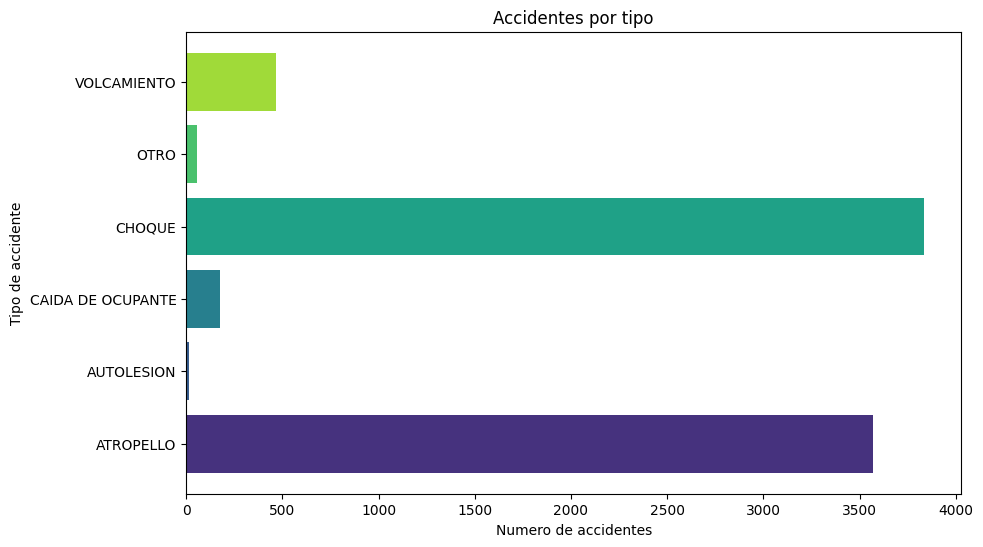

In [61]:
accidentes_por_clase = df.groupby('CLASE_ACC').size().reset_index(name='Total Accidentes') #Agrupa los datos a utilizar en el grafico
plt.figure(figsize=(10, 6)) #Tamaño del grafico
plt.title('Accidentes por tipo') #Titulo del grafico
plt.barh(accidentes_por_clase['CLASE_ACC'], accidentes_por_clase['Total Accidentes'], color=sns.color_palette('viridis', len(accidentes_por_clase))) #Crea el grafico de barras de manera horizontal
plt.xlabel('Numero de accidentes') #Titulo del eje X
plt.ylabel('Tipo de accidente') #Titulo del eje Y
print(accidentes_por_clase) #Muestra informacion del grafico

#**Conclusion**
El gráfico muestra la distribución de accidentes viales clasificados por tipo, revelando diferencias significativas en su frecuencia de ocurrencia.

Los datos indican que los accidentes por choque son los más frecuentes, con un total de 3.836 casos, seguidos por los atropellos, que también registran una alta incidencia (3.570 casos). Esta concentración sugiere que estos dos tipos de accidentes representan el mayor riesgo en las vías y deben ser el foco de estrategias preventivas.

En contraste, los tipos de accidentes como auto-lesiones, caídas de ocupantes, y otros tienen una incidencia mucho menor, lo que podría indicar que son menos comunes o que están subreportados.